# Logistic Regression

* Explain difference between odds and probability. Let a favorable outcome be any chosen outcome, unfavorable outcome be its complement. Odds is the ratio of favorable to unfavorable outcomes, probability is the ratio of favorable outcomes to unfavorable outcomes.
* Logistic regression is a classification model, not a regression model. This means, for example, that MSE cannot be used as evaluation metric.

Why logistic?

$\mathrm{logit}(p) = \log OR = \log \frac{p}{1-p}$

We will model the logit function of a particular event (characterized by a feature vector) as a hyperplane (in the feature space).

$\mathrm{logit}(P(y=1\,|\,\mathbf{x})) = \mathbf{w}^T \mathbf{x}$

Solving the equation for $P(y=1\,|\,\mathbf{x})$ gives us the sigmoid function:

$\frac{p}{1-p} = e^{\mathbf{w}^T \mathbf{x}} \rightarrow p (1 + e^{\mathbf{w}^T \mathbf{x}}) = e^{\mathbf{w}^T \mathbf{x}} \rightarrow p = \frac{e^{\mathbf{w}^T \mathbf{x}}}{1 + e^{\mathbf{w}^T \mathbf{x}}} = \frac{1}{1 + e^{-\mathbf{w}^T \mathbf{x}}} = \phi(\mathbf{w}^T \mathbf{x})$

The weights can be found using batch gradient descent with the sigmoid function. However, cost function must be different. The outputs of our estimation function are probabilities, so we want to maximize the probability of all our samples are correctly classified. Assuming that the samples are iid, and since the probability $P(y^{(i)} \, | \, \mathbf{x}^{(i)}; \mathbf{w})$ has Bernouilli distribution, we can express that as the likelihood:

$L(\mathbf{w}) = P(\mathbf{y}\,|\,\mathbf{X}; \mathbf{w}) = \prod_i P(y^{(i)} \, | \, \mathbf{x}^{(i)}; \mathbf{w}) = \prod_i (\phi(\mathbf{w}^T\mathbf{x}^{(i)})^{y^{(i)}} (1 - \phi(\mathbf{w}^T\mathbf{x}^{(i)})^{1-y^{(i)}}$ 

To avoid rounding errors on due to finite float precision on computers, we minimize the negative log likelihood: $J(\mathbf{w}) = -\ln L(\mathbf{w}) = - \sum_i \ln P(y^{(i)} \, | \, \mathbf{x}^{(i)}; \mathbf{w}) = -\sum_i (y^{(i)} \ln \phi(\mathbf{w}^T\mathbf{x}^{(i)})^{y^{(i)}} + (1-y^{(i)})\ln(1-\phi(\mathbf{w}^T\mathbf{x}^{(i)})))$. 

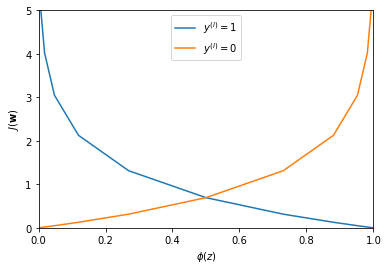

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def phi(z):
    return 1/(1+np.exp(-z))
z = np.arange(-10, 10, 1) 
plt.plot(phi(z), -np.log(phi(z)), label=r'$y^{(i)}=1$')
plt.plot(phi(z), -np.log(1-phi(z)), label=r'$y^{(i)}=0$')
plt.ylim(0, 5)
plt.xlim(0, 1)
plt.xlabel(r'$\phi(z)$')
plt.ylabel(r'$J(\mathbf{w})$')
plt.legend()
plt.show()

In [218]:
def safe_log(x):
    return np.where(x > 0.001, np.log(x), 0)

class LogisticRegression:
    
    def __init__(self, num_iters=100, learning_rate=0.05, epsilon=0.01, init_mean=0.0, init_std=0.01, random_state=1):
        self.num_iters = num_iters
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.init_mean = init_mean
        self.init_std = init_std
        self.random_state = random_state
        
    def _init_weights(self, X):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=self.init_mean, scale=self.init_std, size=X.shape[1]+1)
        
    def predict(self, x):
        return np.where(x >= 0.5, 1, 0)
    
    def _input(self, x):
        return x @ self.w_[1:] + self.w_[0]
    
    def _activation(self, z):
        return 1. / (1 + np.exp(-z))
                    
    def _update_weights(self, errors, X):
        self.w_[1:] += self.learning_rate * X.T @ errors
        self.w_[0] += self.learning_rate * np.sum(errors)
        
    def _record_loss(self, y, output):
        loss = (-y @ safe_log(output)) - (1-y) @ safe_log(1-output)
        self.loss_history_.append(loss)
        
    def fit(self, X, y):
        self.loss_history_ = []
        
        self._init_weights(X)
        for _ in range(self.num_iters):
            output = self._activation(self._input(X))
            errors = y - output
            self._update_weights(errors, X)
            self._record_loss(y, output)

In [219]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.sort_values(by=4)
print('Unique classes: {}'.format(', '.join(df[4].unique())))

Unique classes: Iris-setosa, Iris-versicolor, Iris-virginica


In [220]:
train_size = 100
test_size = 50
X_train, y_train = df.iloc[:train_size, (0,2)].values, df.iloc[:train_size, 4].values
y_train = np.where(y_train == 'Iris-setosa', 1, 0)

In [221]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/home/miroslav/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


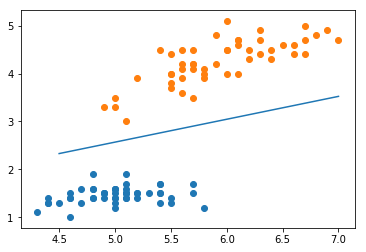

In [222]:
import matplotlib.pyplot as plt

x = np.linspace(4.5, 7, 100)
y = (-x*lr.w_[1] - lr.w_[0]) / lr.w_[2]
plt.scatter(X_train[:50, 0], X_train[:50, 1])
plt.scatter(X_train[50:, 0], X_train[50:, 1])
plt.plot(x, y)
plt.show()